<a href="https://colab.research.google.com/github/rosalesberrospiu-wq/PRUEBA/blob/main/Primer-modelo-regresionlineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INSTALAMOS LAS LIBRERIAS A USAR


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, mean_absolute_percentage_error


### ABRIMOS LOS DATASET QUE ME BRINDA SEABORN

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### ABRIMOS EL DATASET Y LE COLOCAMOS DE NOMBRE DATA

In [3]:
data = sns.load_dataset("mpg")
data.head()                          # El head es para que nos indique las 5 primeras filas

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### COMENZAMOS HACIENDO UN DESCRIBE PARA VER COMO ESTAN NUESTROS DATOS


In [5]:
print(data.info())
print("")
print(data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None

              count         mean         std  ...     50%       75%     max
mpg           398.0    23.514573    7.815984  ...    23.0    29.000    46.6
cylinders     398.0     5.454774    1.701004  ...     4.0     8.000     8.0
displacement  398.0   193.425879  104.269838  ...   148.5   262.000   455.0
horsepower    392.0   104.469388   38.491160  ... 

In [6]:
data.dropna(how="any")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [7]:
data.dropna(how="any",inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [8]:
data.drop(["origin","name"],axis=1,inplace=True)

### Analisis EDA (Analisis Exploratorio de Datos)

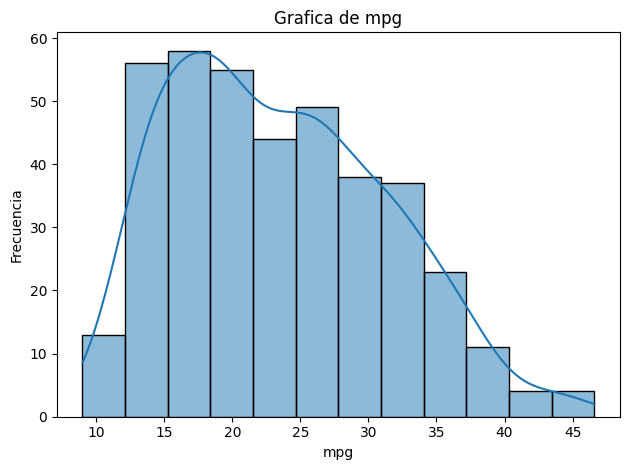

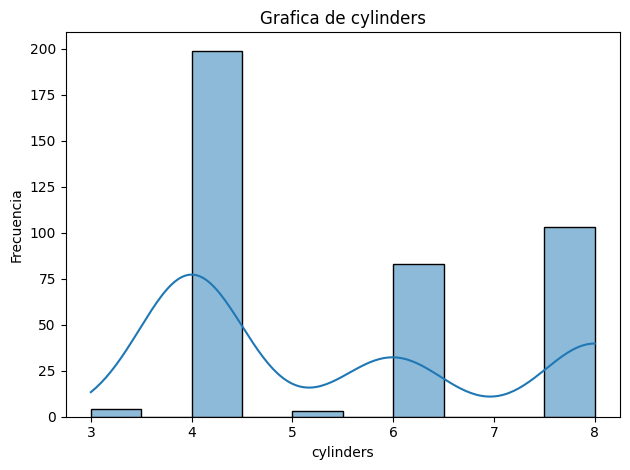

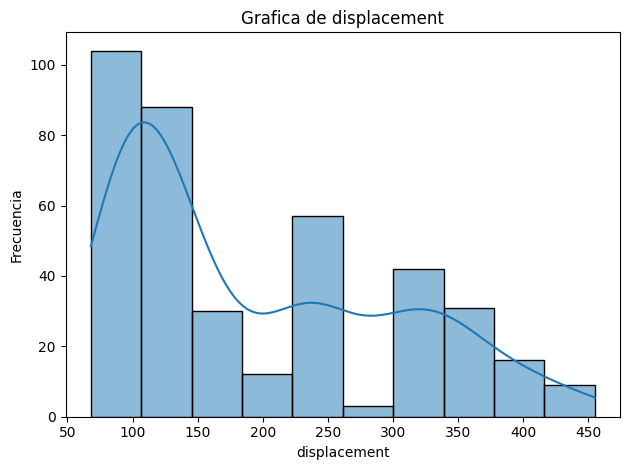

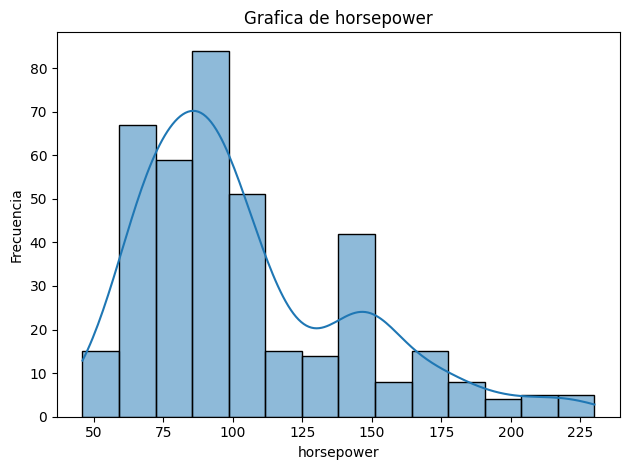

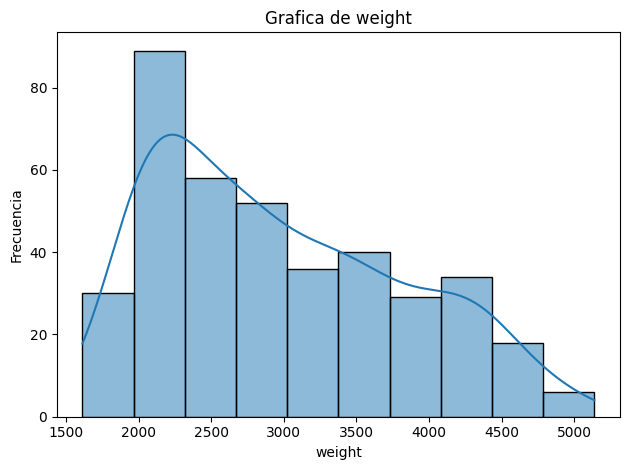

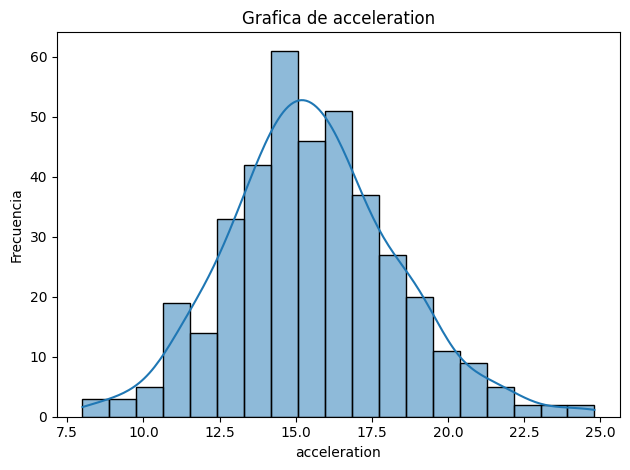

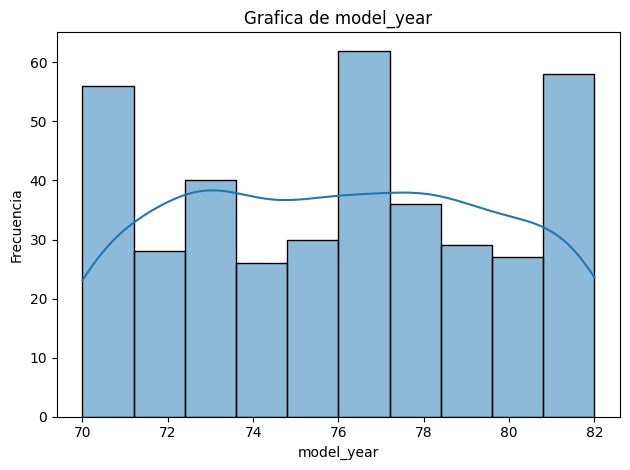

In [9]:
cols_numeric = data.select_dtypes(include="number")
for col in cols_numeric:
    sns.histplot(data[col].dropna(),kde=True)
    plt.title(f"Grafica de {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

### Observaremos las correlaciones que exiten

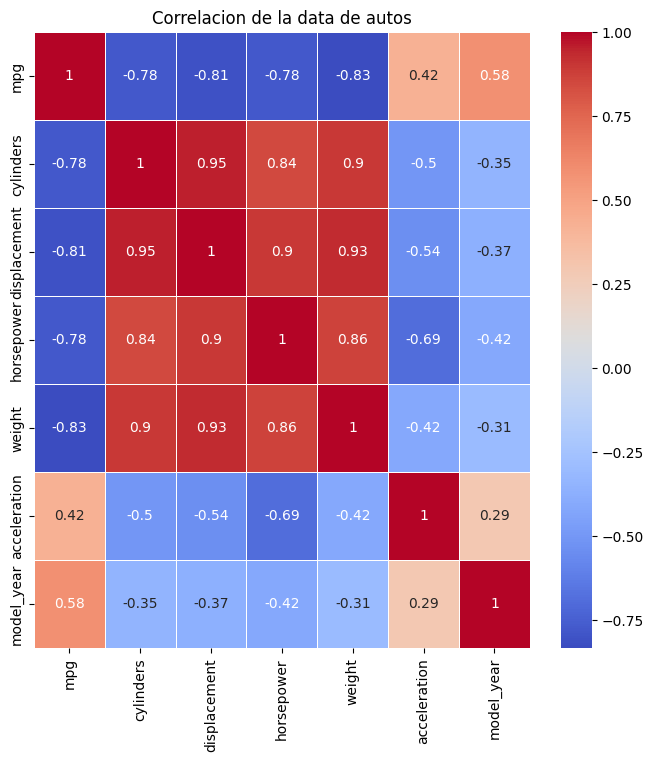

In [10]:
corr_numeric = data.select_dtypes(include="number").corr(method="pearson")
plt.figure(figsize=(8,8))
sns.heatmap(corr_numeric , annot=True,linewidths=0.5,cmap= "coolwarm")
plt.title("Correlacion de la data de autos")
plt.show()

In [22]:
data.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [24]:
data.drop(['cylinders', 'displacement', 'horsepower'],axis=1,inplace=True)

### Observamos que hay alta correlacion entre cylinders , displacament y horsepower

In [25]:
data.columns

Index(['mpg', 'weight', 'acceleration', 'model_year'], dtype='object')

### eliminaremos esas columnas


In [26]:
x = data.drop(columns="mpg")
y = data["mpg"]

### Seleccionamos nuestras variables de entrenamiento y de testeo

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [38]:
x_train

,weight,acceleration,model_year
110,2379,16.5,73
17,2587,16.0,70
320,2434,15.0,80
24,2648,15.0,70
128,3336,17.0,74
...,...,...,...
72,3892,12.5,72
107,2789,15.0,73
272,2855,17.6,78
352,2380,20.7,81


In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## Entrenamos nuestro modelo lineal

In [30]:
linear = LinearRegression()
linear.fit(x_train_scaled,y_train)

LinearRegression()

In [31]:
y_pred = linear.predict(x_test_scaled)

### Evaluamos las metricas

In [39]:
mae = mean_absolute_error(y_test,y_pred)
mape= mean_absolute_percentage_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2= r2_score(y_test,y_pred)

print(f"El valor del MAE es : {mae:.4f}")
print(f"El valor del MAPE es : {mape:.4f}")
print(f"El valor del RMSE es : {rmse:.4f}")
print(f"El valor del R2 es : {r2:.4f}")


El valor del MAE es : 2.5241
El valor del MAPE es : 0.1235
El valor del RMSE es : 3.1723
El valor del R2 es : 0.8098


In [33]:
linear.intercept_

np.float64(23.637591240875913)

In [34]:
linear.coef_

array([-5.67583332,  0.34244214,  2.68296287])

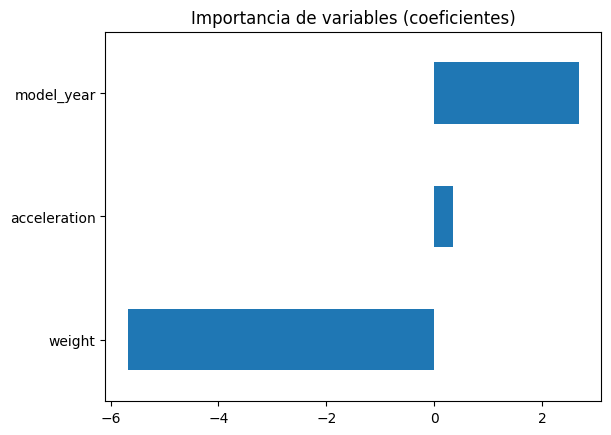

In [35]:
coeficientes = pd.Series(linear.coef_, index=x.columns)

coeficientes.sort_values().plot(kind="barh")

plt.title("Importancia de variables (coeficientes)")
plt.show()